# Pre-class work

We consider the eczema medical trial data set again. This time we will compare which of 2 models explain the observed data best.

* Model 1: All studies have the same probability of success.
* Model 2: A hierarchical model where the probability of success in each study is drawn from a beta prior distribution with unknown $\alpha$ and $\beta$ parameters.


|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


**Model 1:**

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

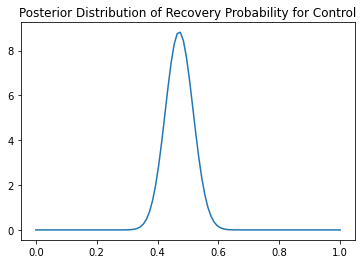

In [7]:
post = stats.beta(58, 65)
x = np.linspace(0, 1, 100)
plt.plot(x, post.pdf(x))
plt.title("Posterior Distribution of Recovery Probability for Control")
plt.show()

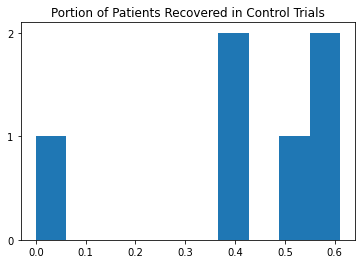

In [53]:
# data from control trials
n_patients = np.array([15, 18, 10, 39, 29, 10])
n_recovered = np.array([9, 11, 4, 21, 12, 0])

plt.hist(n_recovered/n_patients)
plt.title("Portion of Patients Recovered in Control Trials")
plt.yticks([0, 1, 2])
plt.show()

Based on this plot, it looks like something weird is going on with the one trial where no one recovered. We can exploit this to get a test statistic that will differentiate it from the binomial samples.

In [48]:
# generates synthetic data: # of recovered patients in each control group
def sample_model(n):
    ts = post.rvs(n)
    samples = []
    for t in ts:
        samples.append([stats.binom(n, t).rvs() for n in n_patients])
    return np.array(samples)

samples = sample_model(1000)

The test statistic I use is the 0.1 quantile. This is because I know the model will be bad on the left side based on the visualization above.

0.005


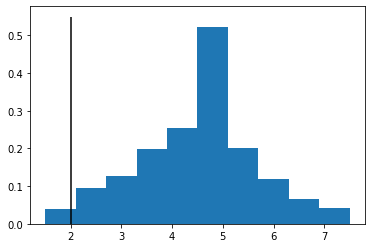

In [44]:
def test(stat):
    sample_stats = np.array([stat(sample) for sample in samples])
    observed_stat = stat(n_recovered)

    print(np.searchsorted(np.sort(sample_stats), observed_stat)/len(sample_stats))
    plt.hist(sample_stats, density=True)
    plt.vlines(observed_stat, *plt.ylim(), color="black")

test(lambda sample: np.quantile(sample, 0.1))

Bingo. This is very statistically significant.